In [1]:
!pip install tensorflow keras matplotlib seaborn opencv-python scikit-learn


In [4]:
import zipfile
import os

# Unzip the dataset
zip_path = "poultry_dataset.zip"  # <-- Replace with your actual zip file name
extract_path = "dataset"

with zipfile.ZipFile("C:/Users/ratna/Downloads/poultry_dataset.zip.zip", 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)


Dataset extracted to: dataset


In [5]:
import os

for root, dirs, files in os.walk("dataset"):
    level = root.replace("dataset", "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files[:3]:  # Show only first 3 files for preview
        print(f"{subindent}{f}")


dataset/
    data.csv
    pytorch-resnet18.ipynb
    data/
        data/
            test/
                Coccidiosis/
                    cocci.0.jpg_aug16.JPG
                    cocci.0.jpg_aug33.JPG
                    cocci.0.jpg_aug34.JPG
                Healthy/
                    healthy.0.jpg_aug1.JPG
                    healthy.0.jpg_aug18.JPG
                    healthy.0.jpg_aug19.JPG
                New Castle Disease/
                    ncd.0.jpg_aug10.JPG
                    ncd.0.jpg_aug11.JPG
                    ncd.0.jpg_aug114.JPG
                Salmonella/
                    pcrsalmo.0.jpg_aug13.JPG
                    pcrsalmo.0.jpg_aug14.JPG
                    pcrsalmo.0.jpg_aug18.JPG
            train/
                Coccidiosis/
                    cocci.0.jpg
                    cocci.0.jpg_aug1.JPG
                    cocci.0.jpg_aug10.JPG
                Healthy/
                    healthy.0.jpg
                    healthy.0.jpg_aug10.JPG
            

In [ ]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# -----------------------------
# Optional Step: Fix extra folder if needed
if os.path.exists('dataset/data/data'):
    shutil.move('dataset/data/data', 'dataset/temp_data')
    shutil.rmtree('dataset/data')
    shutil.move('dataset/temp_data', 'dataset/data')

# -----------------------------
# Set image parameters
img_height = 224
img_width = 224
batch_size = 32

train_dir = 'dataset/data/train'
test_dir = 'dataset/data/test'

# -----------------------------
# Image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# -----------------------------
# Load MobileNetV2 base
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(4, activation='softmax')(x)  # 4 output classes

model = Model(inputs=base_model.input, outputs=predictions)

# -----------------------------
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# -----------------------------
# Train the model
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    callbacks=[early_stop]
)

# -----------------------------
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Found 400000 images belonging to 4 classes.
Found 70677 images belonging to 4 classes.


C:\Users\ratna\anaconda3\envs\tf\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
  232/12500 ━━━━━━━━━━━━━━━━━━━━ 3:16:39 962ms/step - accuracy: 0.3264 - loss: 1.6615

Found 400000 images belonging to 4 classes.
Found 70677 images belonging to 4 classes.


C:\Users\ratna\anaconda3\envs\tf\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7862s 629ms/step - accuracy: 0.6173 - loss: 0.9186 - val_accuracy: 0.7348 - val_loss: 0.6667
Epoch 2/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7918s 633ms/step - accuracy: 0.7046 - loss: 0.7248 - val_accuracy: 0.7461 - val_loss: 0.6357
Epoch 3/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7829s 626ms/step - accuracy: 0.7192 - loss: 0.6931 - val_accuracy: 0.7624 - val_loss: 0.6080
Epoch 4/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7972s 638ms/step - accuracy: 0.7300 - loss: 0.6713 - val_accuracy: 0.7665 - val_loss: 0.5950
Epoch 5/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7997s 640ms/step - accuracy: 0.7338 - loss: 0.6632 - val_accuracy: 0.7713 - val_loss: 0.5813
Epoch 6/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 8027s 642ms/step - accuracy: 0.7383 - loss: 0.6516 - val_accuracy: 0.7769 - val_loss: 0.5769
Epoch 7/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 8148s 652ms/step - accuracy: 0.7405 - loss: 0.6452 - val_accuracy: 0.7767 - val_loss: 0.5772
Epoch 8/10
12500/12500 ━━━━━━━━━━━━━━━━━━

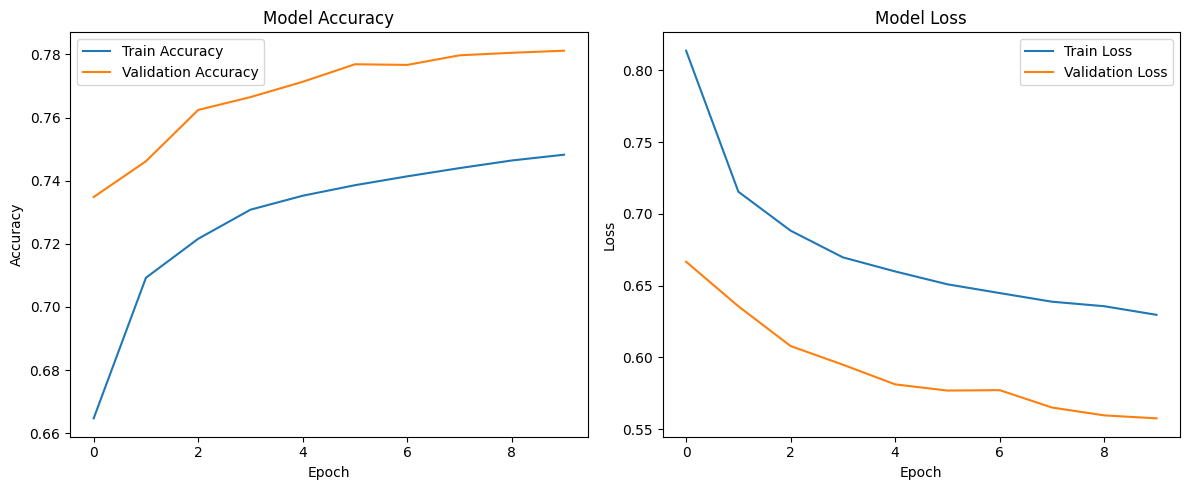

In [1]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# -----------------------------
# Optional Step: Fix extra folder if needed
if os.path.exists('dataset/data/data'):
    shutil.move('dataset/data/data', 'dataset/temp_data')
    shutil.rmtree('dataset/data')
    shutil.move('dataset/temp_data', 'dataset/data')

# -----------------------------
# Set image parameters
img_height = 224
img_width = 224
batch_size = 32

train_dir = 'dataset/data/train'
test_dir = 'dataset/data/test'

# -----------------------------
# Image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# -----------------------------
# Load MobileNetV2 base
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(4, activation='softmax')(x)  # 4 output classes

model = Model(inputs=base_model.input, outputs=predictions)

# -----------------------------
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# -----------------------------
# Train the model
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    callbacks=[early_stop]
)

# -----------------------------
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


2209/2209 ━━━━━━━━━━━━━━━━━━━━ 889s 402ms/step
Classification Report:

                    precision    recall  f1-score   support

       Coccidiosis       0.27      0.25      0.26     18752
           Healthy       0.24      0.27      0.26     17412
New Castle Disease       0.23      0.25      0.24     15888
        Salmonella       0.26      0.23      0.24     18625

          accuracy                           0.25     70677
         macro avg       0.25      0.25      0.25     70677
      weighted avg       0.25      0.25      0.25     70677



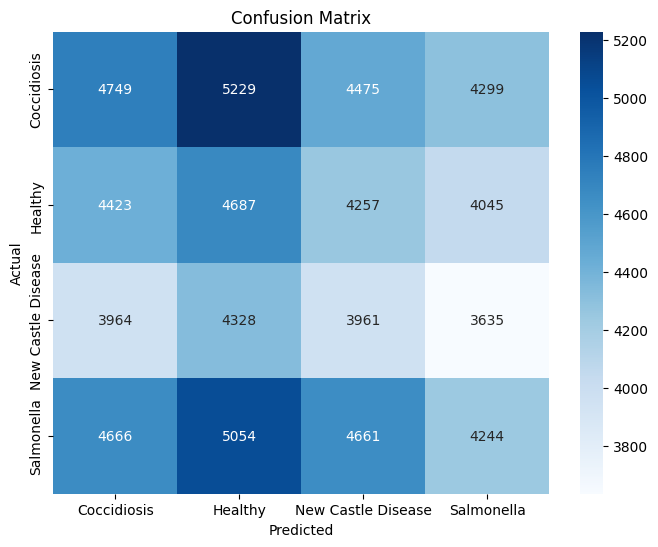

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Step 1: Get predictions
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

# Step 2: Get true labels
y_true = test_data.classes

# Step 3: Class labels
class_names = list(test_data.class_indices.keys())

# Step 4: Print classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Step 5: Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 6: Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [2]:
model.save("poultry_disease_model.h5")



NameError: name 'model' is not defined

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
model = load_model("poultry_disease_model.h5")
print("✅ Model loaded successfully!")

# Reload test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    'dataset/data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Get predictions
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data.classes
class_names = list(test_data.class_indices.keys())

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'poultry_disease_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Rebuild the same model architecture
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile (needed before loading weights)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# OPTIONAL: Load weights if you saved them before (change path if needed)
# model.load_weights('model_weights.h5')  # Uncomment if you have it

print("✅ Model architecture ready.")

# Save this model for future sessions (optional)
# model.save('poultry_disease_model_architecture.h5')


✅ Model architecture ready.


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reload test data generator
test_dir = 'dataset/data/test'  # Update if path is different
img_height = 224
img_width = 224
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for consistent labels
)


Found 70677 images belonging to 4 classes.


C:\Users\ratna\anaconda3\envs\tf\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2209/2209 ━━━━━━━━━━━━━━━━━━━━ 1624s 733ms/step
✅ Classification Report:

                    precision    recall  f1-score   support

       Coccidiosis       0.43      0.00      0.01     18752
           Healthy       0.27      0.73      0.40     17412
New Castle Disease       0.18      0.08      0.11     15888
        Salmonella       0.27      0.24      0.25     18625

          accuracy                           0.26     70677
         macro avg       0.29      0.26      0.19     70677
      weighted avg       0.29      0.26      0.19     70677



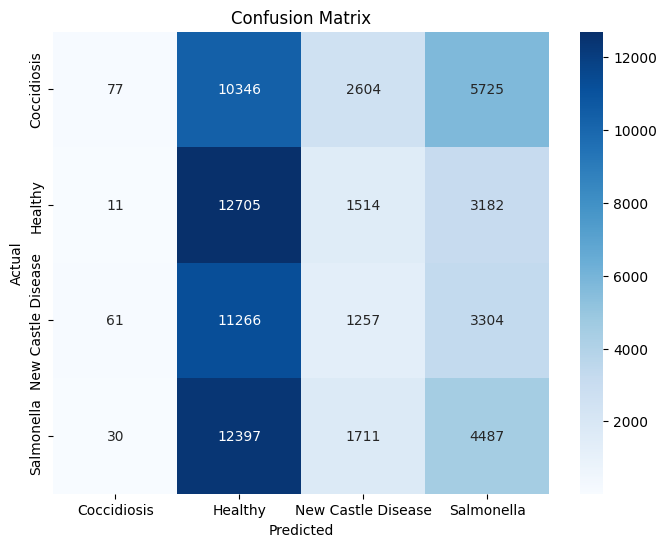

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

# True labels and class names
y_true = test_data.classes
class_names = list(test_data.class_indices.keys())

# Report
print("✅ Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [7]:
# Save model architecture and weights
model.save("poultry_disease_model.h5")

# Save class label mappings
import json

label_map = train_data.class_indices  # E.g., {'Coccidiosis': 0, 'Healthy': 1, ...}
with open("class_indices.json", "w") as f:
    json.dump(label_map, f)

print("✅ Model and class labels saved.")


NameError: name 'train_data' is not defined

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Just recreate the data generators with small batch size
img_height = 224
img_width = 224

data_gen = ImageDataGenerator(rescale=1./255)

train_data = data_gen.flow_from_directory(
    'dataset/data/train',  # Same path as before
    target_size=(img_height, img_width),
    batch_size=1,          # Just 1 image per batch to load quickly
    class_mode='categorical',
    shuffle=False
)


Found 400000 images belonging to 4 classes.


In [9]:
# Save model
model.save("poultry_disease_model.h5")

# Save class labels
import json

label_map = train_data.class_indices
with open("class_indices.json", "w") as f:
    json.dump(label_map, f)

print("✅ Model and class labels saved.")


✅ Model and class labels saved.


In [12]:
import tensorflow as tf
import numpy as np
import json
from tensorflow.keras.preprocessing import image

# Load the model and class labels
model = tf.keras.models.load_model("poultry_disease_model.h5")

with open("class_indices.json", "r") as f:
    class_indices = json.load(f)

# Invert class_indices to get label names
class_names = {v: k for k, v in class_indices.items()}

# Load and preprocess the image
img_path = "C:/Users/ratna/Downloads/sample.png.png"  # change this to your .png image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred)
label = class_names[predicted_class]

print(f"Predicted class: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Predicted class: Healthy


In [13]:
import tensorflow as tf
import numpy as np
import json
from tensorflow.keras.preprocessing import image

# Load the model and class labels
model = tf.keras.models.load_model("poultry_disease_model.h5")

with open("class_indices.json", "r") as f:
    class_indices = json.load(f)

# Invert class_indices to get label names
class_names = {v: k for k, v in class_indices.items()}

# Load and preprocess the image
img_path = "C:/Users/ratna/Downloads/chiccken.jpg" 
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred)
label = class_names[predicted_class]

print(f"Predicted class: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted class: Healthy


In [14]:
import tensorflow as tf
import numpy as np
import json
from tensorflow.keras.preprocessing import image

# Load the model and class labels
model = tf.keras.models.load_model("poultry_disease_model.h5")

with open("class_indices.json", "r") as f:
    class_indices = json.load(f)

# Invert class_indices to get label names
class_names = {v: k for k, v in class_indices.items()}

# Load and preprocess the image
img_path = "C:/Users/ratna/Downloads/s2.png"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred)
label = class_names[predicted_class]

print(f"Predicted class: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted class: Healthy


In [15]:
import os

test_folder = "C:/Users/ratna/Downloads/poultry_dataset.zip.zip" # replace with your folder
for filename in os.listdir(test_folder):
    if filename.endswith((".jpg", ".png", ".jpeg")):
        path = os.path.join(test_folder, filename)
        img = image.load_img(path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        pred = model.predict(img_array)
        predicted_class = np.argmax(pred)
        label = class_names[predicted_class]
        print(f"{filename}: {label}")


NotADirectoryError: [WinError 267] The directory name is invalid: 'C:/Users/ratna/Downloads/poultry_dataset.zip.zip'

In [16]:
import pandas as pd

results = []

for filename in os.listdir(test_folder):
    if filename.endswith((".jpg", ".png", ".jpeg")):
        path = os.path.join(test_folder, filename)
        img = image.load_img(path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        pred = model.predict(img_array)
        predicted_class = np.argmax(pred)
        label = class_names[predicted_class]
        results.append({"Image": filename, "Prediction": label})

df = pd.DataFrame(results)
df.to_csv("predictions.csv", index=False)


NotADirectoryError: [WinError 267] The directory name is invalid: 'C:/Users/ratna/Downloads/poultry_dataset.zip.zip'

In [18]:
model.save("poultry_disease_model.h5")


In [19]:
model.save("poultry_disease_model.h5")
print("Model saved as poultry_disease_model.h5")


Model saved as poultry_disease_model.h5


In [20]:
# Save model using HDF5 format (older format)
model.save("poultry_disease_model.h5")  # Optional, but not recommended


In [21]:
model.save("poultry_disease_model.h5")
print("Model saved as poultry_disease_model.h5")


Model saved as poultry_disease_model.h5


In [22]:
model.save("poultry_disease_model.h5")
print("Model saved as poultry_disease_model.h5")


Model saved as poultry_disease_model.h5
